In [1]:
# ========================================================================
#                   Matplotlib Basics for Econometrics
# ========================================================================
#    Module: Matplotlib - Intermediate
#    Topic: Intermediates Plotting with Matplotlib
#    
#    Description:
#    This notebook continues our exploration of Matplotlib basics,
#    focusing on additional features commonly used in econometric analysis.
#    
#    Contents:
#      1. Area Plots
#      2. Error Bars and Confidence Intervals
#      3. Box Plots
#      4. Histograms with KDE
#      5. Advanced Text and Annotations
#      6. Saving and Exporting Plots
#    
#    Author: Dr. Saad Laouadi
#    Version: 1.0
#    
# ========================================================================
#  ®Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [2]:
# ====================================================
#     Environment Setup: Import Required Libraries
# ====================================================
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')

# Set random seed for reproducibility
np.random.seed(42)

print("-"*52)
%reload_ext watermark
%watermark -a "Dr. Saad Laouadi"
%watermark -iv -ud
print("-"*52)

----------------------------------------------------
Author: Dr. Saad Laouadi

Last updated: 2025-03-10

numpy     : 1.26.4
pandas    : 2.2.3
sys       : 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]
matplotlib: 3.10.0

----------------------------------------------------


## 1. Area Plots

Area plots are useful for showing cumulative totals or compositions over time.

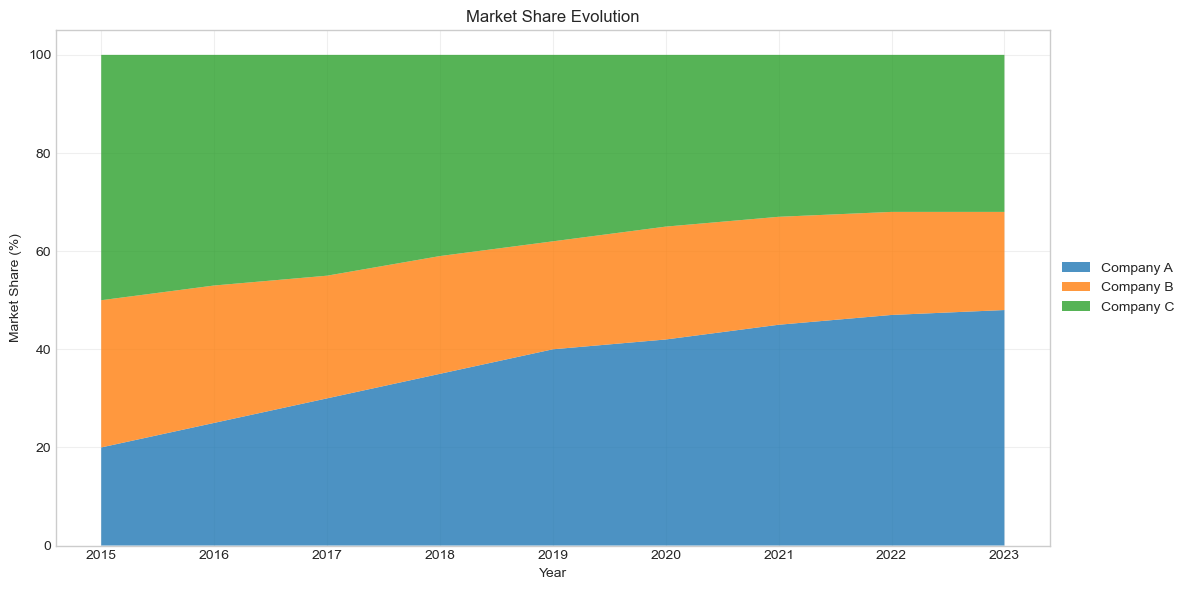

In [3]:
# Generate sample data for market share over time
years = np.arange(2015, 2024)
company_a = np.array([20, 25, 30, 35, 40, 42, 45, 47, 48])
company_b = np.array([30, 28, 25, 24, 22, 23, 22, 21, 20])
company_c = np.array([50, 47, 45, 41, 38, 35, 33, 32, 32])

plt.figure(figsize=(12, 6))
plt.stackplot(years, [company_a, company_b, company_c],
              labels=['Company A', 'Company B', 'Company C'],
              alpha=0.8)

plt.title('Market Share Evolution')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Error Bars and Confidence Intervals

Error bars are crucial for showing uncertainty in economic data.

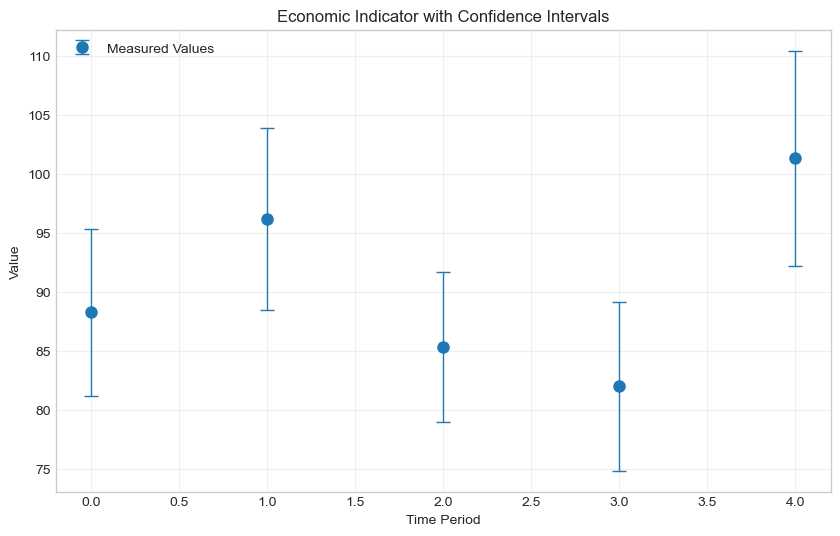

In [4]:
# Generate sample data with confidence intervals
np.random.seed(1010)
x = np.arange(5)
y = np.random.normal(100, 10, 5)
error = np.random.uniform(5, 10, 5)

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', capsize=5, 
             capthick=1, elinewidth=1, markersize=8,
             label='Measured Values')

plt.title('Economic Indicator with Confidence Intervals')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Box Plots

Box plots are excellent for showing the distribution of economic variables across categories.

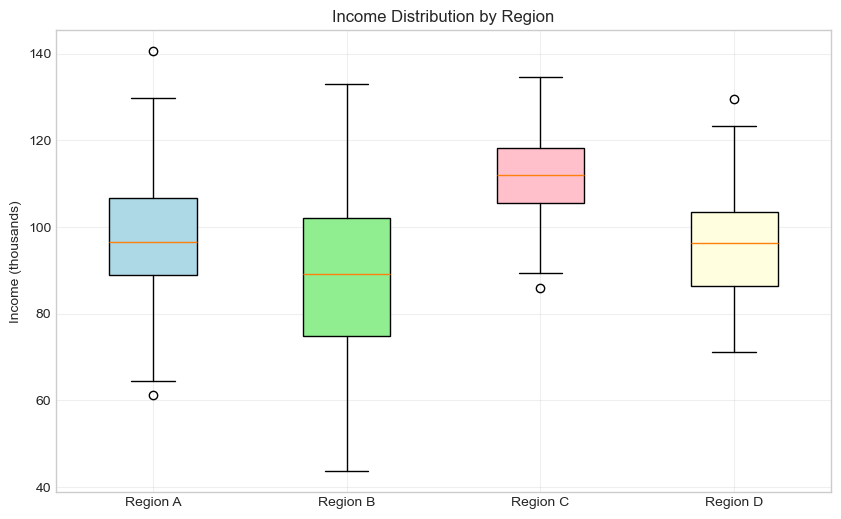

In [5]:
# Generate sample data for different regions
np.random.seed(1010)

data = [np.random.normal(100, 15, 100),
        np.random.normal(90, 20, 100),
        np.random.normal(110, 10, 100),
        np.random.normal(95, 12, 100)]

plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(data,
                       patch_artist=True,
                       tick_labels=['Region A', 'Region B', 'Region C', 'Region D'])

# Customize box colors
colors = ['lightblue', 'lightgreen', 'pink', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Income Distribution by Region')
plt.ylabel('Income (thousands)')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Histograms with KDE

Combining histograms with kernel density estimation provides a comprehensive view of data distribution.

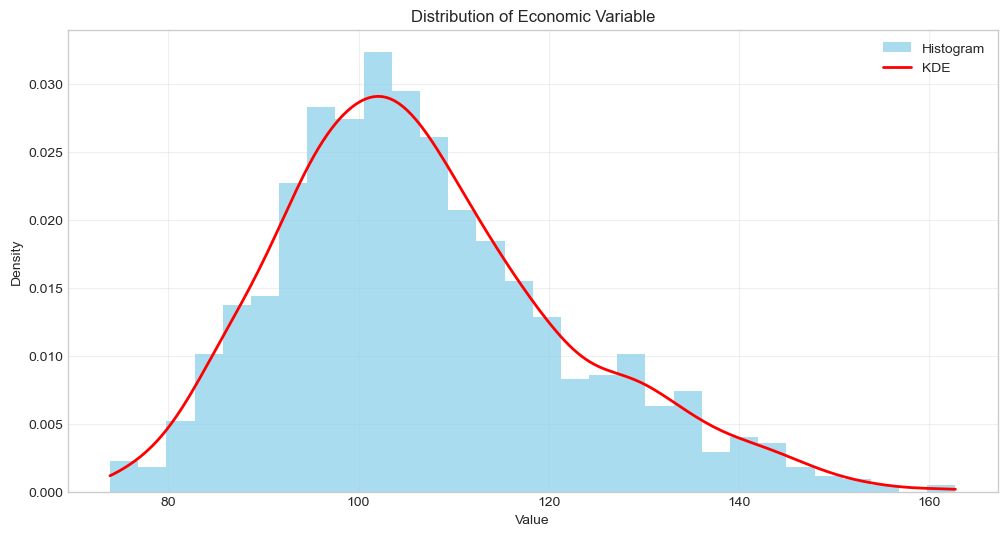

In [6]:
# Generate sample data
np.random.seed(1010)
data = np.concatenate([np.random.normal(100, 10, 1000),
                       np.random.normal(120, 15, 500)])

plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue',
         label='Histogram')

# Add KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 200)
plt.plot(x_range, kde(x_range), 'r-', lw=2, label='KDE')

plt.title('Distribution of Economic Variable')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Advanced Text and Annotations

Adding detailed annotations can help highlight important features in economic data.

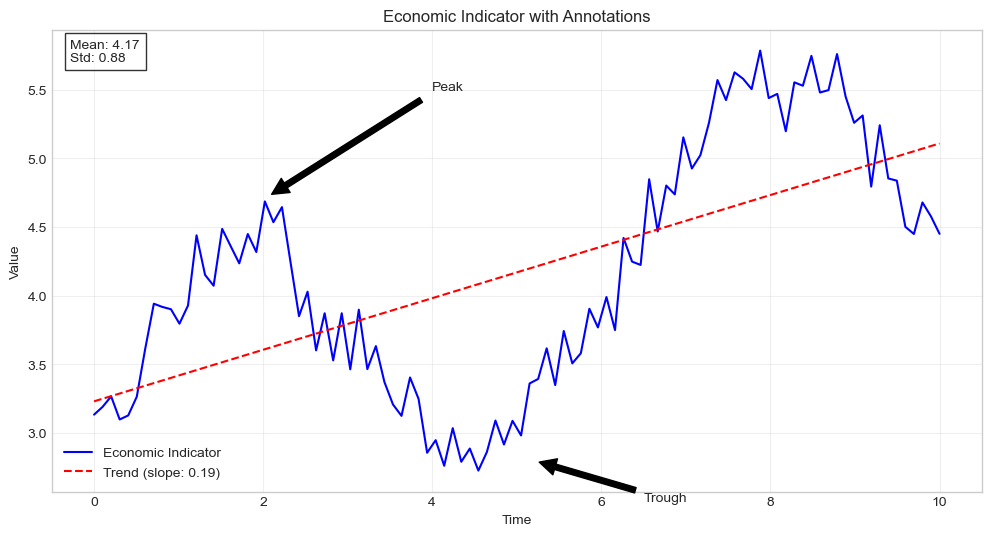

In [7]:
# Generate sample time series
x = np.linspace(0, 10, 100)
y = 3 + 0.2 * x + np.sin(x) + np.random.normal(0, 0.2, 100)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-', label='Economic Indicator')

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', label=f'Trend (slope: {z[0]:.2f})')

# Add annotations
plt.annotate('Peak', xy=(2, 4.7), xytext=(4, 5.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Trough', xy=(5.2, 2.8), xytext=(6.5, 2.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add text box with statistics
stats_text = f'Mean: {np.mean(y):.2f}\nStd: {np.std(y):.2f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')

plt.title('Economic Indicator with Annotations')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Saving and Exporting Plots

Learn how to save plots in various formats suitable for publications and presentations. To save a plot generated with matplotlib you can use the `savefig()` function. 

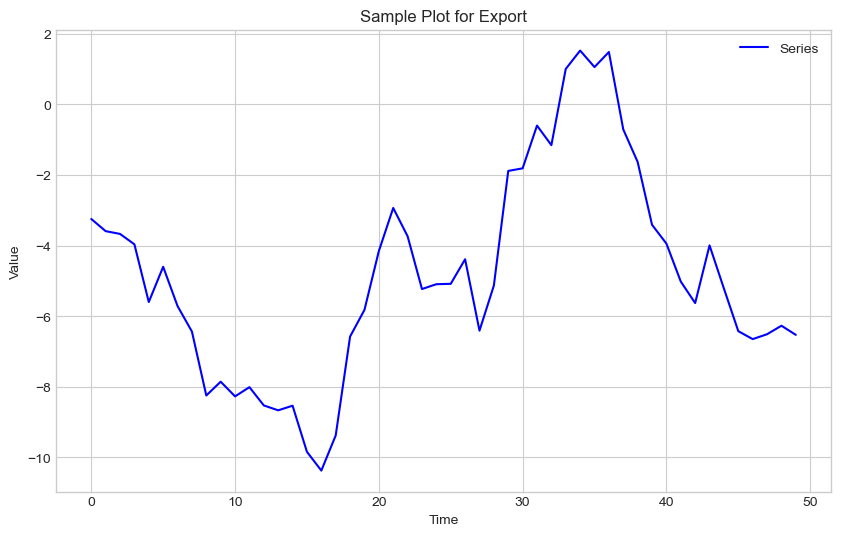

In [8]:
# Create a sample plot
plt.figure(figsize=(10, 6))
plt.plot(np.random.randn(50).cumsum(), 'b-', label='Series')
plt.title('Sample Plot for Export')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Save in different formats
# PNG (good for web)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# PDF (vector format, good for publications)
plt.savefig('plot.pdf', bbox_inches='tight')

# SVG (vector format, good for web)
plt.savefig('plot.svg', bbox_inches='tight')

plt.show()

## Practice Exercises

1. Create an area plot showing the composition of GDP over time
2. Make a box plot comparing income distributions across different education levels
3. Create a histogram with KDE for inflation rates
4. Generate a plot with multiple annotations highlighting key economic events

## Summary

- Area plots are useful for showing composition changes over time
- Error bars and confidence intervals help communicate uncertainty
- Box plots and histograms are valuable for understanding distributions
- Annotations can highlight key features and provide context
- Different file formats serve different purposes when saving plots

In the next notebook, we'll explore specialized plots for econometric analysis, including regression diagnostics and time series decomposition.